# Topic: Feature Engineering

In this Exercise we will do feature engineering and train our model using logistic regression with hyperparameter tuning(grid_search)

Dataset - Telco-Customer-Churn.csv

Developer - Saurav Bhagat

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import f1_score

In [2]:
#Data Preperation
df = pd.read_csv('Telco-Customer-Churn.csv')
data = df.query("Contract == 'Month-to-month'")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3875 non-null   object 
 1   gender            3875 non-null   object 
 2   SeniorCitizen     3875 non-null   int64  
 3   Partner           3875 non-null   object 
 4   Dependents        3875 non-null   object 
 5   tenure            3875 non-null   int64  
 6   PhoneService      3875 non-null   object 
 7   MultipleLines     3875 non-null   object 
 8   InternetService   3875 non-null   object 
 9   OnlineSecurity    3875 non-null   object 
 10  OnlineBackup      3875 non-null   object 
 11  DeviceProtection  3875 non-null   object 
 12  TechSupport       3875 non-null   object 
 13  StreamingTV       3875 non-null   object 
 14  StreamingMovies   3875 non-null   object 
 15  Contract          3875 non-null   object 
 16  PaperlessBilling  3875 non-null   object 
 17  

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,3875.000000,3875.000000,3875.000000
mean,0.208258,18.036645,66.398490
std,0.406115,17.689054,26.926599
min,0.000000,1.000000,18.750000
25%,0.000000,3.000000,45.850000
50%,0.000000,12.000000,73.250000
75%,0.000000,29.000000,88.875000
max,1.000000,72.000000,117.450000


In [6]:
#Split training and testing data
from sklearn.model_selection import train_test_split

x = data.drop(['Churn'], axis = 1)
y = data['Churn']
y = y.map(dict(Yes=1, No= 0))

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 123, test_size = 0.2, stratify = y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3100, 20)
(775, 20)
(3100,)
(775,)


In [7]:
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

Churn
0    0.572903
1    0.427097
Name: proportion, dtype: float64
Churn
0    0.572903
1    0.427097
Name: proportion, dtype: float64


In [8]:
# Drop unnecessary Features
x_train = x_train.drop(['customerID','gender','Contract'], axis =1)
x_train.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

# Encoding & Scalling

In [9]:
#Numeric Columns - Transform and scale
num_cols = x_train._get_numeric_data().columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [10]:
x_train['SeniorCitizen'] = x_train['SeniorCitizen'].astype(str)
x_train['TotalCharges'] = x_train['TotalCharges'].astype(float)

num_cols = x_train._get_numeric_data().columns
num_cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [11]:
cat_cols = x_train.drop(num_cols, axis = 1)
cat_cols.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

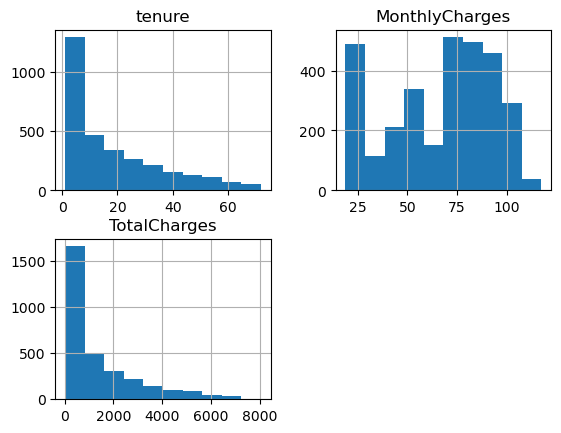

In [12]:
x_train[num_cols].hist()

array([[<Axes: title={'center': 'tenure_power'}>,
        <Axes: title={'center': 'TotalCharges_power'}>]], dtype=object)

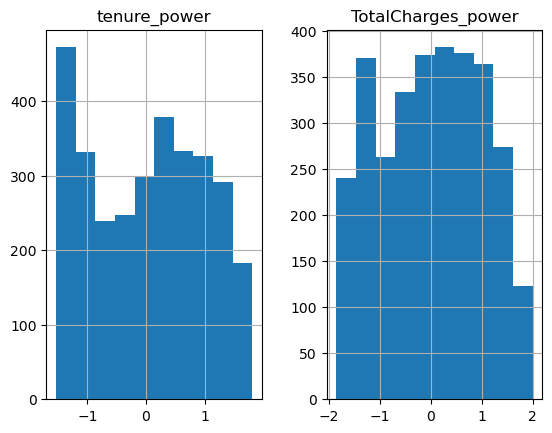

In [13]:
from sklearn.preprocessing import power_transform

x_train[['tenure_power', 'TotalCharges_power']] = power_transform(x_train[['tenure','TotalCharges']], method = 'box-cox')
x_train[['tenure_power', 'TotalCharges_power']].hist()

array([[<Axes: title={'center': 'tenure_power_scaled'}>,
        <Axes: title={'center': 'TotalCharges_power_scaled'}>],
       [<Axes: title={'center': 'MonthlyCharges_scaled'}>, <Axes: >]],
      dtype=object)

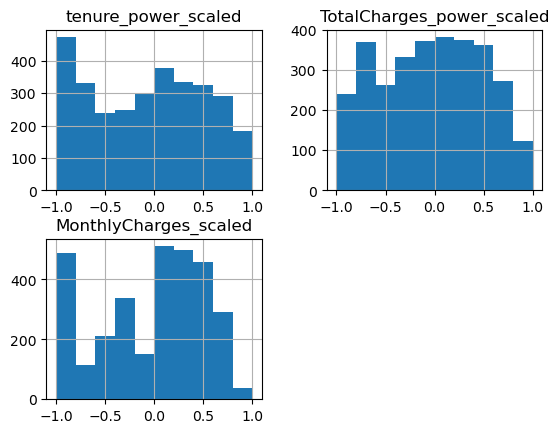

In [14]:
#Scalling numeric columns
def ab_scalar( X, a, b, max_x, min_x):
    return a+ ((X-min_x)*(b-a))/(max_x - min_x)

for column in ['tenure_power', 'TotalCharges_power', 'MonthlyCharges']:
    min = x_train[column].min()
    max = x_train[column].max()
    new_col = (column +'_scaled')
    x_train[new_col] = x_train[column].apply(lambda x : ab_scalar(X = x, a= -1, b= 1, min_x = min, max_x = max))

numeric_features = x_train.filter(regex = '_scaled', axis = 1).reset_index(drop = True)
numeric_features.hist()


In [15]:
# Encoding Categorical columns
for col in cat_cols:
    print(x_train[col].value_counts())

SeniorCitizen
0    2455
1     645
Name: count, dtype: int64
Partner
No     1984
Yes    1116
Name: count, dtype: int64
Dependents
No     2467
Yes     633
Name: count, dtype: int64
PhoneService
Yes    2790
No      310
Name: count, dtype: int64
MultipleLines
No                  1618
Yes                 1172
No phone service     310
Name: count, dtype: int64
InternetService
Fiber optic    1698
DSL             980
No              422
Name: count, dtype: int64
OnlineSecurity
No                     2102
Yes                     576
No internet service     422
Name: count, dtype: int64
OnlineBackup
No                     1836
Yes                     842
No internet service     422
Name: count, dtype: int64
DeviceProtection
No                     1932
Yes                     746
No internet service     422
Name: count, dtype: int64
TechSupport
No                     2156
Yes                     522
No internet service     422
Name: count, dtype: int64
StreamingTV
No                     1651
Yes 

we have some binary columns with values [0,1], [yes, no]

In [16]:
# Encoding Binary columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling']
for col in binary_cols:
    new_col = str(col +'_be')
    x_train[new_col] = encoder.fit_transform(x_train[col])
    
binary_features = x_train.filter(regex = '_be', axis = 1).reset_index(drop= True)
binary_features

,SeniorCitizen_be,Partner_be,Dependents_be,PhoneService_be,PaperlessBilling_be
0,0,1,0,1,0
1,0,1,0,1,1
2,0,1,0,1,1
3,1,1,1,0,1
4,0,0,0,1,1
...,...,...,...,...,...
3095,1,1,0,1,1
3096,0,1,1,1,0
3097,0,1,1,1,0
3098,0,0,1,1,1


In [17]:
# One hot Encoding for multiclass columns
multiclass_cols = list(set(cat_cols)- set(binary_cols))
multiclass_cols

['InternetService',
 'StreamingTV',
 'MultipleLines',
 'StreamingMovies',
 'PaymentMethod',
 'DeviceProtection',
 'TechSupport',
 'OnlineBackup',
 'OnlineSecurity']

In [18]:
# fetching uniques categories from all multiclass features
categories = []
for col in multiclass_cols:
    categories.append(x_train[col].unique())
categories

[array(['Fiber optic', 'DSL', 'No'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No phone service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['Bank transfer (automatic)', 'Electronic check', 'Mailed check',
        'Credit card (automatic)'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['Yes', 'No', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['Yes', 'No', 'No internet service'], dtype=object)]

In [19]:
from sklearn.preprocessing import OneHotEncoder
One_encoder = OneHotEncoder(sparse_output=False, categories=categories)

multiclass_features = One_encoder.fit_transform(x_train[multiclass_cols])
multiclass_features = pd.DataFrame(multiclass_features, columns = One_encoder.get_feature_names_out())
multiclass_features.head()

,InternetService_Fiber optic,InternetService_DSL,InternetService_No,StreamingTV_No,StreamingTV_Yes,StreamingTV_No internet service,MultipleLines_No,MultipleLines_Yes,MultipleLines_No phone service,StreamingMovies_No,...,DeviceProtection_No internet service,TechSupport_Yes,TechSupport_No,TechSupport_No internet service,OnlineBackup_No,OnlineBackup_Yes,OnlineBackup_No internet service,OnlineSecurity_Yes,OnlineSecurity_No,OnlineSecurity_No internet service
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Building Dataframe

In [20]:
x_train_fe = pd.concat([numeric_features, binary_features, multiclass_features], axis = 1)
x_train_fe.head()

,tenure_power_scaled,TotalCharges_power_scaled,MonthlyCharges_scaled,SeniorCitizen_be,Partner_be,Dependents_be,PhoneService_be,PaperlessBilling_be,InternetService_Fiber optic,InternetService_DSL,...,DeviceProtection_No internet service,TechSupport_Yes,TechSupport_No,TechSupport_No internet service,OnlineBackup_No,OnlineBackup_Yes,OnlineBackup_No internet service,OnlineSecurity_Yes,OnlineSecurity_No,OnlineSecurity_No internet service
0,-0.037704,0.066415,0.258359,0,1,0,1,0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.504461,0.605726,0.735562,0,1,0,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.079644,-0.057262,-0.264438,0,1,0,1,1,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.037704,-0.233416,-0.786221,1,1,1,0,1,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.000000,-0.677466,0.141844,0,0,0,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Feature Selection 
now we have 36 features and we have to do feature selection

In [21]:
from sklearn import linear_model
from sklearn.feature_selection import RFECV    #Recursive Feature Elimination and cross validation
model = linear_model.LogisticRegression()

selector = RFECV(estimator = model,
                min_features_to_select =3,
                scoring = 'f1',
                cv = 5)

In [22]:
selector.fit(x_train_fe, y_train)

RFECV(cv=5, estimator=LogisticRegression(), min_features_to_select=3,
      scoring='f1')

In [23]:
selector.support_  #( gives boolean masks for disordered features which we can filter out )

array([ True,  True, False,  True, False, False, False,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False,  True,  True, False, False,  True,  True, False, False])

In [24]:
# we have 16 features that really contribute to model prediction and have as effect
print(len(x_train_fe.columns[selector.support_]))
x_train_fe.columns[selector.support_]

16


Index(['tenure_power_scaled', 'TotalCharges_power_scaled', 'SeniorCitizen_be',
       'PaperlessBilling_be', 'InternetService_Fiber optic',
       'InternetService_DSL', 'InternetService_No', 'StreamingTV_No',
       'MultipleLines_No', 'StreamingMovies_No internet service',
       'PaymentMethod_Electronic check',
       'DeviceProtection_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'OnlineBackup_No internet service',
       'OnlineSecurity_Yes'],
      dtype='object')

In [25]:
x_train_fe = x_train_fe.loc[ : , selector.support_]
x_train_fe.head()

,tenure_power_scaled,TotalCharges_power_scaled,SeniorCitizen_be,PaperlessBilling_be,InternetService_Fiber optic,InternetService_DSL,InternetService_No,StreamingTV_No,MultipleLines_No,StreamingMovies_No internet service,PaymentMethod_Electronic check,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,OnlineBackup_No internet service,OnlineSecurity_Yes
0,-0.037704,0.066415,0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.504461,0.605726,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.079644,-0.057262,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.037704,-0.233416,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.000000,-0.677466,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [26]:
x_train_fe.shape

(3100, 16)

# Model Training

In [27]:
# Training and tuning model
from sklearn.model_selection import GridSearchCV
parameters = {'class_weight' :[None, 'balanced'], 'solver': ['newton-cg','liblinear','lbfgs', 'sag','saga']}

model = linear_model.LogisticRegression(fit_intercept = True, max_iter = 1000)

grid_search = GridSearchCV(model, parameters, cv = 5, scoring = 'f1')
grid_search.fit(x_train_fe, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [None, 'balanced'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag',
                                    'saga']},
             scoring='f1')

In [28]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.003126,0.006251,0.006248,0.007653,balanced,liblinear,"{'class_weight': 'balanced', 'solver': 'liblin...",0.649123,0.661922,0.675229,0.696915,0.660714,0.668781,0.016320,1
5,0.006304,0.006546,0.006250,0.007654,balanced,newton-cg,"{'class_weight': 'balanced', 'solver': 'newton...",0.649123,0.661922,0.673993,0.696915,0.660714,0.668533,0.016229,2
8,0.024853,0.008779,0.003232,0.006210,balanced,sag,"{'class_weight': 'balanced', 'solver': 'sag'}",0.649123,0.661922,0.673993,0.696915,0.660714,0.668533,0.016229,2
9,0.037235,0.006801,0.003906,0.005091,balanced,saga,"{'class_weight': 'balanced', 'solver': 'saga'}",0.649123,0.661922,0.673993,0.696915,0.660714,0.668533,0.016229,2
7,0.015764,0.004114,0.000262,0.000525,balanced,lbfgs,"{'class_weight': 'balanced', 'solver': 'lbfgs'}",0.647887,0.661922,0.673993,0.696915,0.660714,0.668286,0.016529,5


In [29]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [30]:
best_model.fit(x_train_fe, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [31]:
y_train_pred = best_model.predict(x_train_fe)
train_score = f1_score(y_train, y_train_pred)
train_score

0.6721369960756333

# Feature importance

<Axes: xlabel='Feature'>

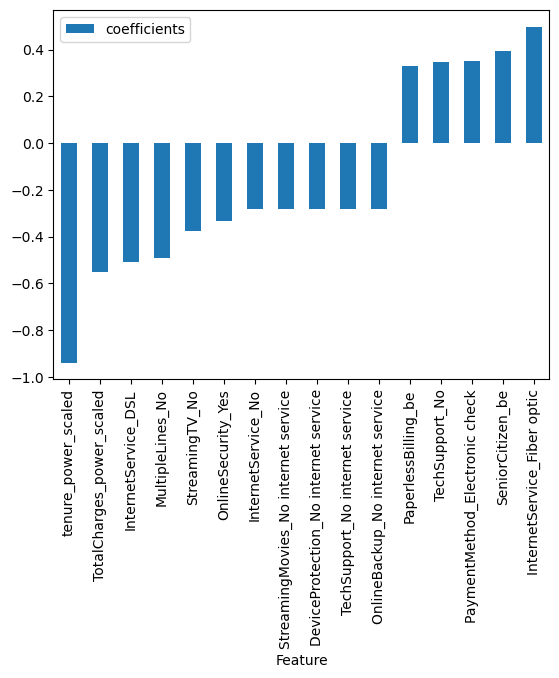

In [32]:
feature_imp_df = pd.DataFrame({'Feature': list(x_train_fe.columns), 'coefficients':best_model.coef_[0]})
feature_imp_df.sort_values('coefficients').plot.bar(x='Feature', y='coefficients')

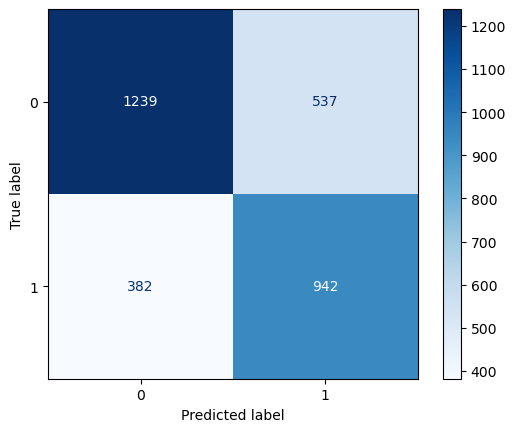

In [33]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model.predict(x_train_fe)

cm = confusion_matrix(y_train, y_pred, labels = best_model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = best_model.classes_)
plt.plot(cmap = 'Blues')

# Model Evaluation
We will apply same feature transformations on test dataset and evaluate trained model on test dataset

In [34]:
#Numeric_feature_test
x_test[['tenure_power', 'TotalCharges_power']] = power_transform(x_test[['tenure', 'TotalCharges']])
for column in ['tenure_power', 'TotalCharges_power', 'MonthlyCharges']:
    min = x_train[column].min()# keeping same stats from train
    max = x_train[column].max()
    new_col = (column +'_scaled')
    x_test[new_col] = x_test[column].apply(lambda x : ab_scalar(X = x, a= -1, b= 1, min_x = min, max_x = max))

numeric_feature_test = x_test.filter(regex = '_scaled', axis = 1).reset_index(drop = True)

#Binary_feature_test
for col in binary_cols:
    new_col = str(col +'_be')
    x_test[new_col] = encoder.fit_transform(x_test[col])

binary_feature_test = x_test.filter(regex = '_be', axis = 1).reset_index(drop = True)

#multiclass_feature_test
multiclass_feature_test = One_encoder.fit_transform(x_test[multiclass_cols])
multiclass_feature_test  = pd.DataFrame(multiclass_feature_test, columns = One_encoder.get_feature_names_out())

In [35]:
print(multiclass_feature_test.shape)
print(binary_feature_test.shape)
print(numeric_feature_test.shape)

(775, 28)
(775, 5)
(775, 3)


In [36]:
x_test_fe = pd.concat([numeric_feature_test, binary_feature_test, multiclass_feature_test], axis = 1)
x_test_fe.head()

,tenure_power_scaled,TotalCharges_power_scaled,MonthlyCharges_scaled,SeniorCitizen_be,Partner_be,Dependents_be,PhoneService_be,PaperlessBilling_be,InternetService_Fiber optic,InternetService_DSL,...,DeviceProtection_No internet service,TechSupport_Yes,TechSupport_No,TechSupport_No internet service,OnlineBackup_No,OnlineBackup_Yes,OnlineBackup_No internet service,OnlineSecurity_Yes,OnlineSecurity_No,OnlineSecurity_No internet service
0,-0.012712,-0.022581,-0.279635,0,0,0,1,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.222714,0.259316,0.315096,0,1,1,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.604125,0.486756,0.001013,0,0,0,1,0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.391589,0.422223,0.321175,0,0,0,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.616854,-0.320691,0.234043,0,1,0,1,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [37]:
x_test_fe = x_test_fe.loc[:, selector.support_]

In [38]:
y_pred = best_model.predict(x_test_fe)
test_score = f1_score(y_test, y_pred)
test_score

0.664756446991404

In [39]:
print('Model_Score_on_training_data: ',train_score)
print('Model_Score_on_test_data: ',test_score)


Model_Score_on_training_data:  0.6721369960756333
Model_Score_on_test_data:  0.664756446991404


In [41]:
# WE got near about same score on test dataset as well